<a href="https://colab.research.google.com/github/yeagerca/Cameron-Yeager-Machine-Learning-Projects/blob/main/yeagerProject1Part2NewAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

None of the data is sorted or reshaped during this analysis. I could not figure out how to mold multivariate inputs to the functions required.

# Multivariate Regression Results

Set1

Mean Absolute Error: 0.20448445238147997

Mean Squared Error: 0.07963281138122426

Root Mean Squared Error: 0.2821928620309597

Set2

Mean Absolute Error: 0.24957813809054177

Mean Squared Error: 0.12718328270526572

Root Mean Squared Error: 0.35662765274900615

Set3

Mean Absolute Error: 0.2220355473694873

Mean Squared Error: 0.09377800697193761

Root Mean Squared Error: 0.306231949626321

Set4

Mean Absolute Error: 0.24662200533841241

Mean Squared Error: 0.12747501265977226

Root Mean Squared Error: 0.35703643043780875

Set5

Mean Absolute Error: 0.22412535433716382

Mean Squared Error: 0.09728016205698839

Root Mean Squared Error: 0.31189767882590663

Set6

Mean Absolute Error: 0.24453125907158407

Mean Squared Error: 0.1242223310701245

Root Mean Squared Error: 0.3524518847589334

Set7

Mean Absolute Error: 0.20796605217265896

Mean Squared Error: 0.08566700465280022

Root Mean Squared Error: 0.2926892629612508

# Program Setup and Data Retrieval

In [1]:
#imports
import os
import requests
import zipfile
import pandas as pd
import numpy as np
#for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#for split
from operator import itemgetter
from sklearn.model_selection import train_test_split
#for training and evaluation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn import metrics

#Declaring some functions for generic operations
#Funciton to strip the dollar signs from some columns
def removeDollarsign(arr):
  i = 0
  for x in arr:
    v = float(np.char.strip(x, '$'))
    arr[i] = v
    i = i + 1
  return arr
#Function to estimate error
def estimateError(y_test, y_pred):
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Start of data set up
#Get data from csv
GoogleDriveFile = 'https://drive.google.com/file/d/1sVQ6oKQRlCLQ_42cBcXOp39nwvruSr6s/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + GoogleDriveFile.split('/')[-2] #Get the url
df = pd.read_csv(url)

In [2]:
#Data organization and Output Data Preparation
tempArr1 = removeDollarsign(df.Price.to_numpy())
tempArr2 = removeDollarsign(df.Price_Animal.to_numpy())
dfPrices = pd.DataFrame({'Price': tempArr1, 'Price_Animal': tempArr2}, columns=['Price', 'Price_Animal'])
data = [df['Call_Wt'], df['Delivered_Wt'], df['Dry_Weight'], df['Num_Animals'], dfPrices['Price'], dfPrices['Price_Animal'], df['DMI']]
headers = ['Call_Wt', 'Delivered_Wt', 'Dry_Weight', 'Num_Animals', 'Price', 'Price_Animal', 'DMI']
newdf = pd.concat(data, axis=1, keys=headers)

#Choose Output Data
y = newdf['DMI']
y = (y - np.mean(y)) / np.std(y)

# Set1 Input Data Preparation (All Inputs)

In [3]:
#Choose Input Data
X = newdf[['Call_Wt', 'Delivered_Wt', 'Dry_Weight', 'Num_Animals', 'Price', 'Price_Animal']].copy()
X = (X - np.mean(X)) / np.std(X)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


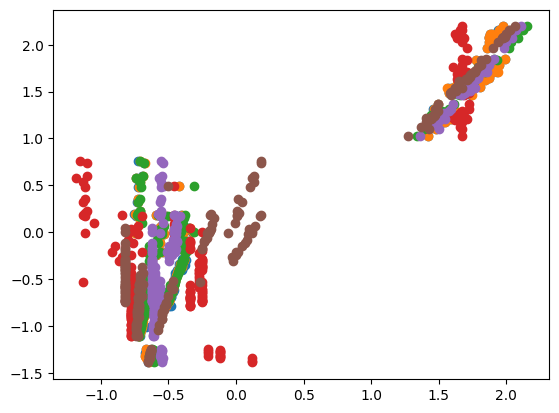

In [4]:
#Full Dataset Visualization
plt.figure(0)#All inputs
plt.scatter(X.iloc[:,0].values, y)
plt.scatter(X.iloc[:,1].values, y)
plt.scatter(X.iloc[:,2].values, y)
plt.scatter(X.iloc[:,3].values, y)
plt.scatter(X.iloc[:,4].values, y)
plt.scatter(X.iloc[:,5].values, y)

In [5]:
#Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

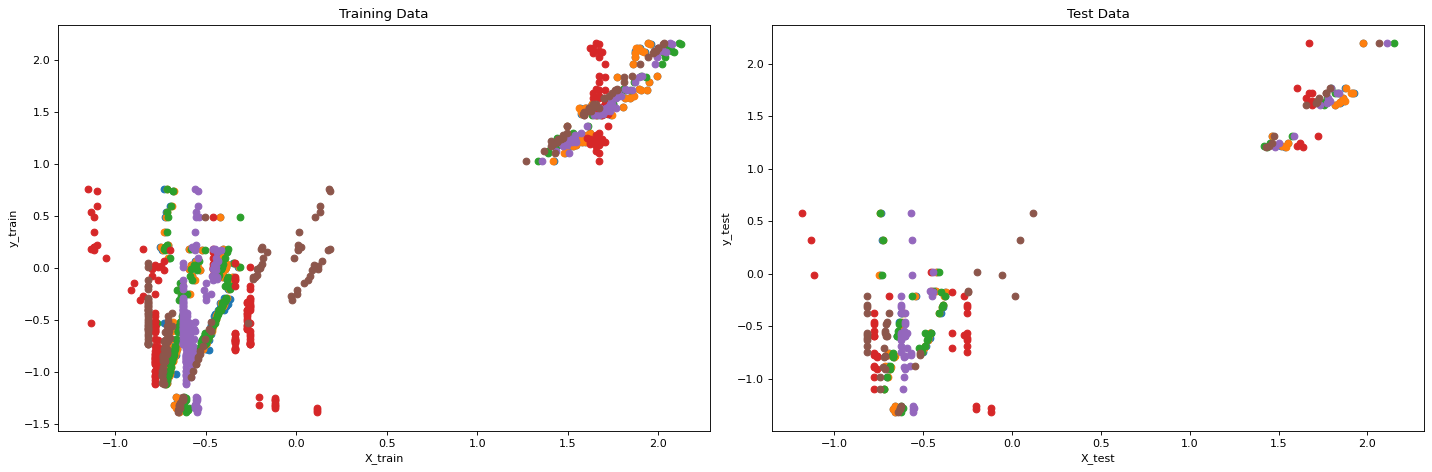

In [6]:
#Train Dataset and Test Dataset Visualization
figure(figsize=(18,6), dpi=80)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_train.iloc[:,0].values, y_train)
plt.scatter(X_train.iloc[:,1].values, y_train)
plt.scatter(X_train.iloc[:,2].values, y_train)
plt.scatter(X_train.iloc[:,3].values, y_train)
plt.scatter(X_train.iloc[:,4].values, y_train)
plt.scatter(X_train.iloc[:,5].values, y_train)
plt.title("Training Data")
plt.xlabel('X_train')
plt.ylabel('y_train')

plt.subplot(1, 2, 2) # index 2
plt.scatter(X_test.iloc[:,0].values, y_test)
plt.scatter(X_test.iloc[:,1].values, y_test)
plt.scatter(X_test.iloc[:,2].values, y_test)
plt.scatter(X_test.iloc[:,3].values, y_test)
plt.scatter(X_test.iloc[:,4].values, y_test)
plt.scatter(X_test.iloc[:,5].values, y_test)
plt.title("Test Data")
plt.xlabel('X_test')
plt.ylabel('y_test')

plt.tight_layout()
plt.show()

# Set1 Pipeline, Prediction, and Error  (All Inputs)

In [7]:
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor())
polyreg_fit.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('sgdregressor', SGDRegressor())])

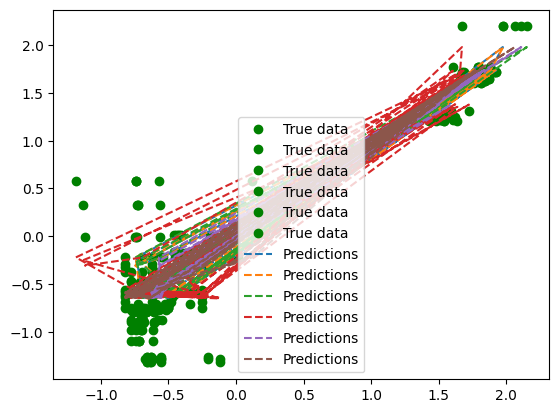

Mean Absolute Error: 0.20151354148360745
Mean Squared Error: 0.08098154940553125
Root Mean Squared Error: 0.28457257317867307


In [8]:
#Generate prediction
y_pred = polyreg_fit.predict(X_test)

#Plot the prediction
plt.clf()
plt.plot(X_test, y_test, 'go', label='True data')
plt.plot(X_test, y_pred, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

#Estimate errors
estimateError(y_test, y_pred)

# Set2 'Call_Wt', 'Delivered_Wt'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


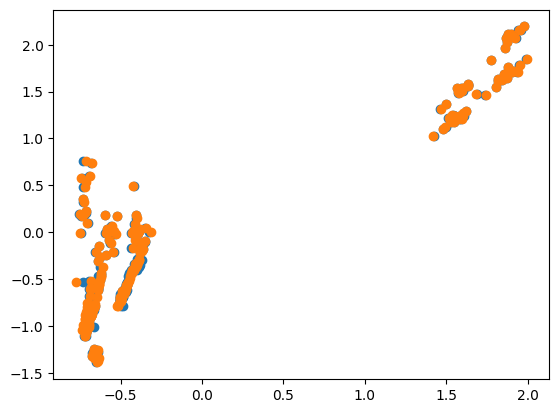

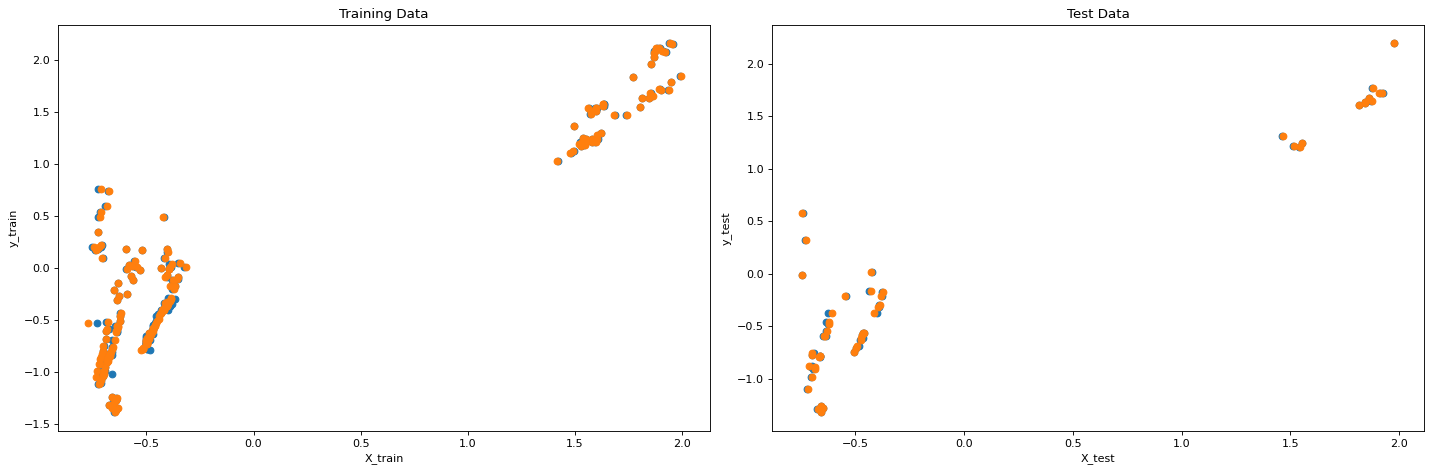

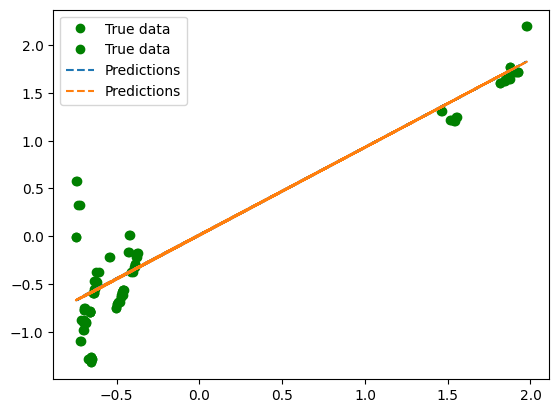

Mean Absolute Error: 0.2500118314963967
Mean Squared Error: 0.1273828495466476
Root Mean Squared Error: 0.3569073402812663


In [9]:
#Choose Input Data
X = newdf[['Call_Wt', 'Delivered_Wt']].copy()
X = (X - np.mean(X)) / np.std(X)

#Full Dataset Visualization
plt.figure(1)#Call_Wt and Delivered_Wt
plt.scatter(X.iloc[:,0].values, y)
plt.scatter(X.iloc[:,1].values, y)

#Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Train Dataset and Test Dataset Visualization
figure(figsize=(18,6), dpi=80)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_train.iloc[:,0].values, y_train)
plt.scatter(X_train.iloc[:,1].values, y_train)
plt.title("Training Data")
plt.xlabel('X_train')
plt.ylabel('y_train')

plt.subplot(1, 2, 2) # index 2
plt.scatter(X_test.iloc[:,0].values, y_test)
plt.scatter(X_test.iloc[:,1].values, y_test)
plt.title("Test Data")
plt.xlabel('X_test')
plt.ylabel('y_test')

plt.tight_layout()
plt.show()

#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor())
polyreg_fit.fit(X_train, y_train)

#Generate prediction
y_pred = polyreg_fit.predict(X_test)

#Plot the prediction
plt.clf()
plt.plot(X_test, y_test, 'go', label='True data')
plt.plot(X_test, y_pred, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

#Estimate errors
estimateError(y_test, y_pred)

# Set3 'Price', 'Price_Animal'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


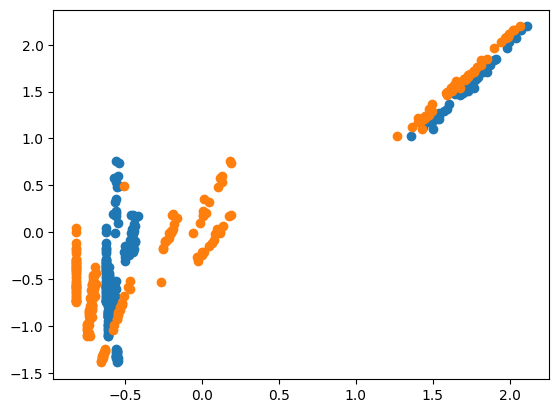

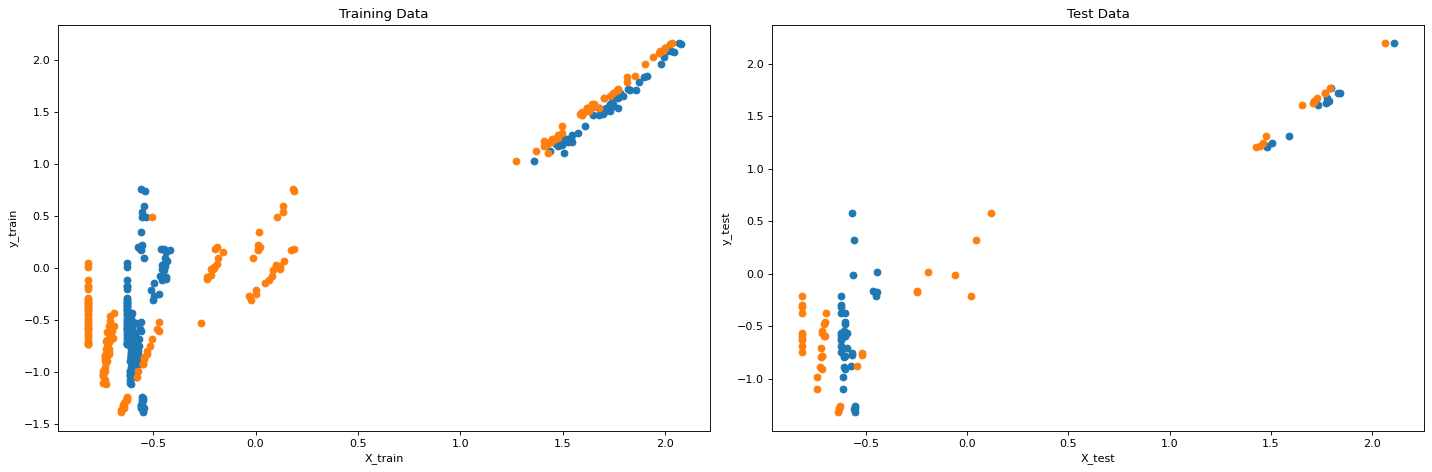

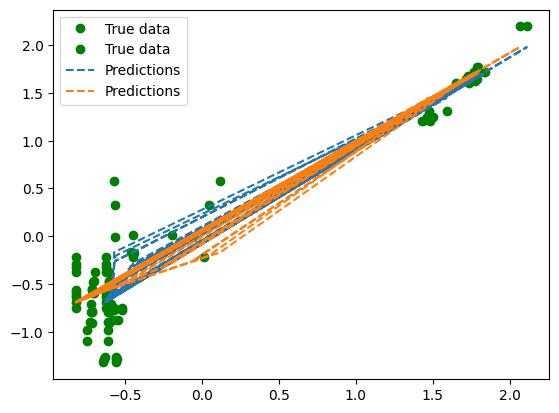

Mean Absolute Error: 0.2221048085864602
Mean Squared Error: 0.09376235350854686
Root Mean Squared Error: 0.3062063903783637


In [10]:
#Choose Input Data
X = newdf[['Price', 'Price_Animal']].copy()
X = (X - np.mean(X)) / np.std(X)

#Full Dataset Visualization
plt.figure(2)#Price and Price_Animal
plt.scatter(X.iloc[:,0].values, y)
plt.scatter(X.iloc[:,1].values, y)

#Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Train Dataset and Test Dataset Visualization
figure(figsize=(18,6), dpi=80)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_train.iloc[:,0].values, y_train)
plt.scatter(X_train.iloc[:,1].values, y_train)
plt.title("Training Data")
plt.xlabel('X_train')
plt.ylabel('y_train')

plt.subplot(1, 2, 2) # index 2
plt.scatter(X_test.iloc[:,0].values, y_test)
plt.scatter(X_test.iloc[:,1].values, y_test)
plt.title("Test Data")
plt.xlabel('X_test')
plt.ylabel('y_test')

plt.tight_layout()
plt.show()

#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor())
polyreg_fit.fit(X_train, y_train)

#Generate prediction
y_pred = polyreg_fit.predict(X_test)

#Plot the prediction
plt.clf()
plt.plot(X_test, y_test, 'go', label='True data')
plt.plot(X_test, y_pred, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

#Estimate errors
estimateError(y_test, y_pred)

# Set4 'Call_Wt', 'Delivered_Wt', 'Dry_Weight'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


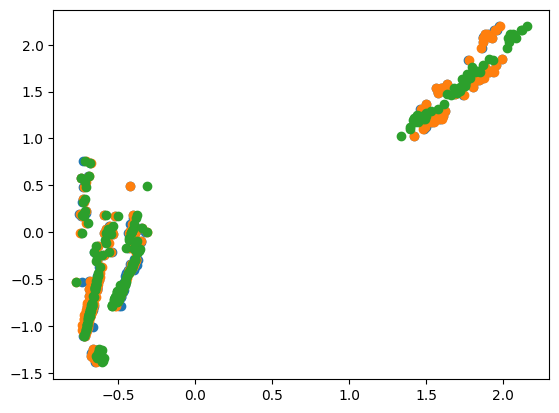

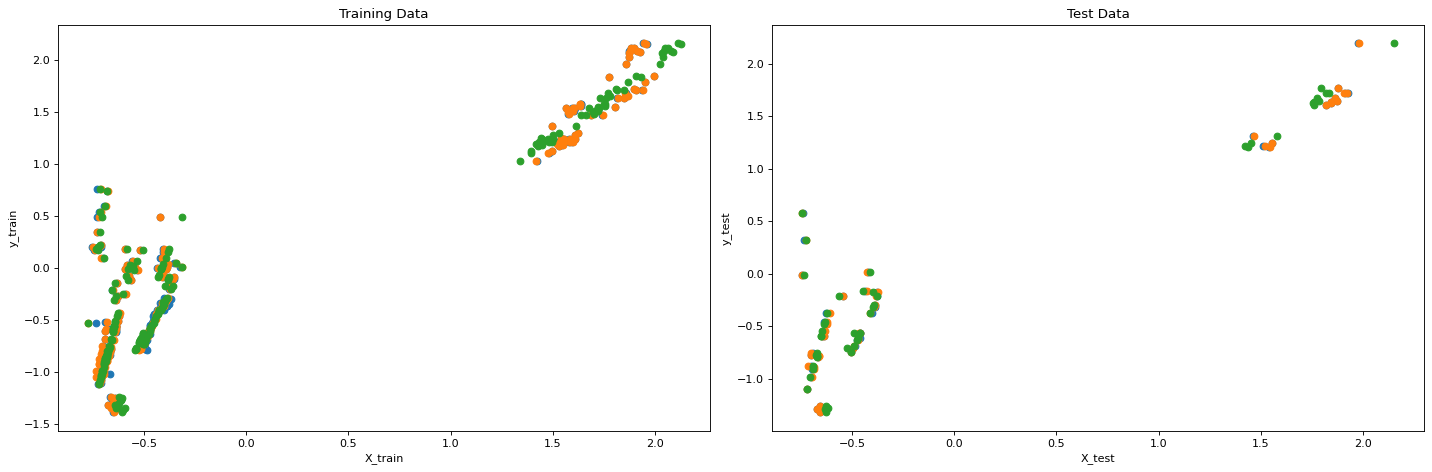

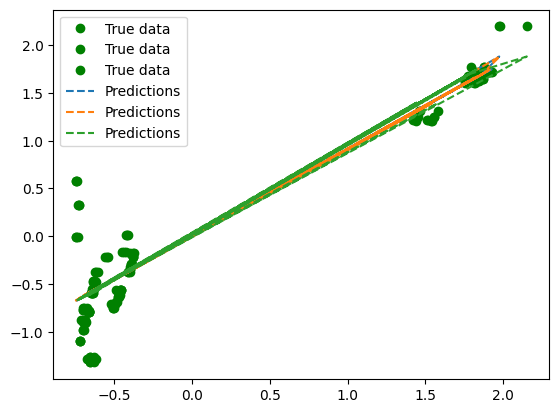

Mean Absolute Error: 0.24461014198885436
Mean Squared Error: 0.12636736797099804
Root Mean Squared Error: 0.3554818813540263


In [11]:
#Choose Input Data
X = newdf[['Call_Wt', 'Delivered_Wt', 'Dry_Weight']].copy()
X = (X - np.mean(X)) / np.std(X)

#Full Dataset Visualization
plt.figure(3)#Call_Wt, Delivered_Wt and Dry_Weight
plt.scatter(X.iloc[:,0].values, y)
plt.scatter(X.iloc[:,1].values, y)
plt.scatter(X.iloc[:,2].values, y)

#Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Train Dataset and Test Dataset Visualization
figure(figsize=(18,6), dpi=80)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_train.iloc[:,0].values, y_train)
plt.scatter(X_train.iloc[:,1].values, y_train)
plt.scatter(X_train.iloc[:,2].values, y_train)
plt.title("Training Data")
plt.xlabel('X_train')
plt.ylabel('y_train')

plt.subplot(1, 2, 2) # index 2
plt.scatter(X_test.iloc[:,0].values, y_test)
plt.scatter(X_test.iloc[:,1].values, y_test)
plt.scatter(X_test.iloc[:,2].values, y_test)
plt.title("Test Data")
plt.xlabel('X_test')
plt.ylabel('y_test')

plt.tight_layout()
plt.show()

#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor())
polyreg_fit.fit(X_train, y_train)

#Generate prediction
y_pred = polyreg_fit.predict(X_test)

#Plot the prediction
plt.clf()
plt.plot(X_test, y_test, 'go', label='True data')
plt.plot(X_test, y_pred, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

#Estimate errors
estimateError(y_test, y_pred)

# Set5 'Num_Animals', 'Price', 'Price_Animal'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


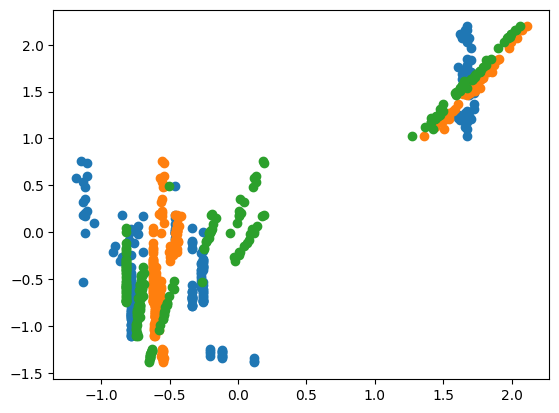

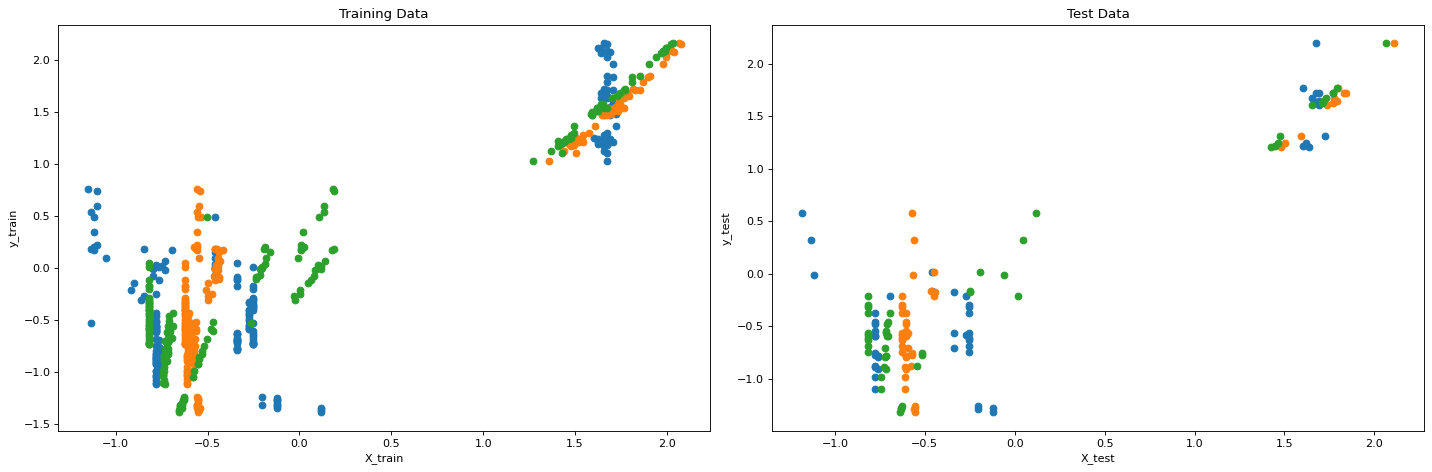

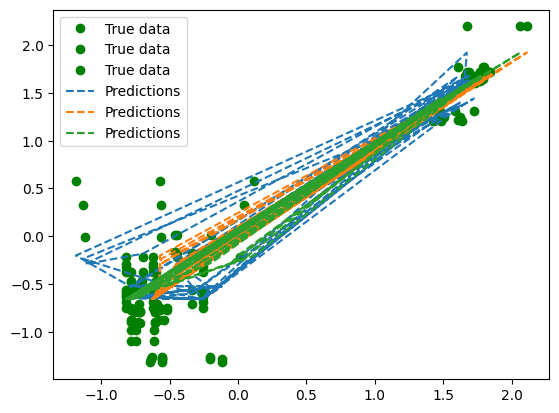

Mean Absolute Error: 0.2243903157061953
Mean Squared Error: 0.09744237748073717
Root Mean Squared Error: 0.31215761640673956


In [12]:
#Choose Input Data
X = newdf[['Num_Animals', 'Price', 'Price_Animal']].copy()
X = (X - np.mean(X)) / np.std(X)

#Full Dataset Visualization
plt.figure(4)#Num_Animals, Price, and Price_Animal
plt.scatter(X.iloc[:,0].values, y)
plt.scatter(X.iloc[:,1].values, y)
plt.scatter(X.iloc[:,2].values, y)

#Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Train Dataset and Test Dataset Visualization
figure(figsize=(18,6), dpi=80)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_train.iloc[:,0].values, y_train)
plt.scatter(X_train.iloc[:,1].values, y_train)
plt.scatter(X_train.iloc[:,2].values, y_train)
plt.title("Training Data")
plt.xlabel('X_train')
plt.ylabel('y_train')

plt.subplot(1, 2, 2) # index 2
plt.scatter(X_test.iloc[:,0].values, y_test)
plt.scatter(X_test.iloc[:,1].values, y_test)
plt.scatter(X_test.iloc[:,2].values, y_test)
plt.title("Test Data")
plt.xlabel('X_test')
plt.ylabel('y_test')

plt.tight_layout()
plt.show()

#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor())
polyreg_fit.fit(X_train, y_train)

#Generate prediction
y_pred = polyreg_fit.predict(X_test)

#Plot the prediction
plt.clf()
plt.plot(X_test, y_test, 'go', label='True data')
plt.plot(X_test, y_pred, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

#Estimate errors
estimateError(y_test, y_pred)

# Set6 'Call_Wt', 'Dry_Weight', 'Price'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


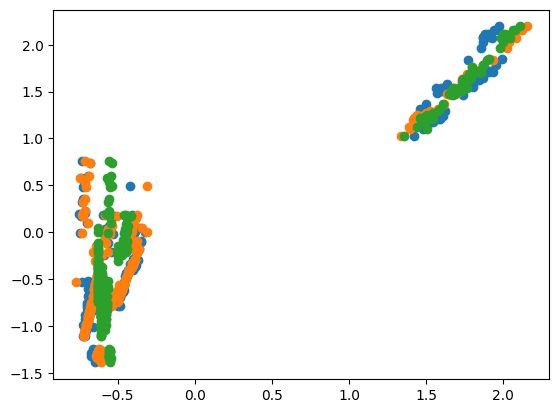

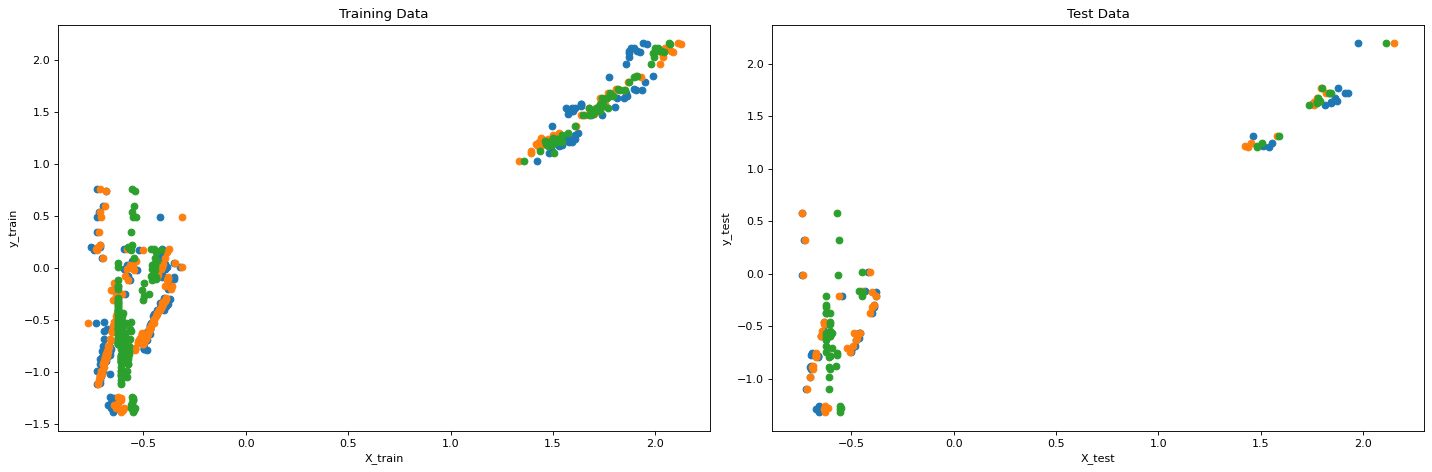

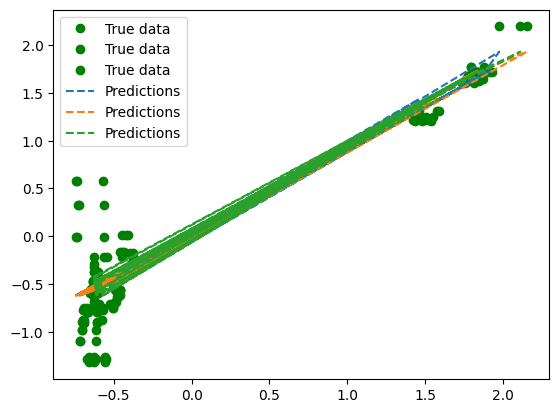

Mean Absolute Error: 0.24554807755499783
Mean Squared Error: 0.12470783083854461
Root Mean Squared Error: 0.3531399592775428


In [13]:
#Choose Input Data
X = newdf[['Call_Wt', 'Dry_Weight', 'Price']].copy()
X = (X - np.mean(X)) / np.std(X)

#Full Dataset Visualization
plt.figure(5)#Call_Wt, Dry_Weight, and Price
plt.scatter(X.iloc[:,0].values, y)
plt.scatter(X.iloc[:,1].values, y)
plt.scatter(X.iloc[:,2].values, y)

#Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Train Dataset and Test Dataset Visualization
figure(figsize=(18,6), dpi=80)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_train.iloc[:,0].values, y_train)
plt.scatter(X_train.iloc[:,1].values, y_train)
plt.scatter(X_train.iloc[:,2].values, y_train)
plt.title("Training Data")
plt.xlabel('X_train')
plt.ylabel('y_train')

plt.subplot(1, 2, 2) # index 2
plt.scatter(X_test.iloc[:,0].values, y_test)
plt.scatter(X_test.iloc[:,1].values, y_test)
plt.scatter(X_test.iloc[:,2].values, y_test)
plt.title("Test Data")
plt.xlabel('X_test')
plt.ylabel('y_test')

plt.tight_layout()
plt.show()

#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor())
polyreg_fit.fit(X_train, y_train)

#Generate prediction
y_pred = polyreg_fit.predict(X_test)

#Plot the prediction
plt.clf()
plt.plot(X_test, y_test, 'go', label='True data')
plt.plot(X_test, y_pred, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

#Estimate errors
estimateError(y_test, y_pred)

# Set7 'Delivered_Wt', 'Num_Animals', 'Price_Animal'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


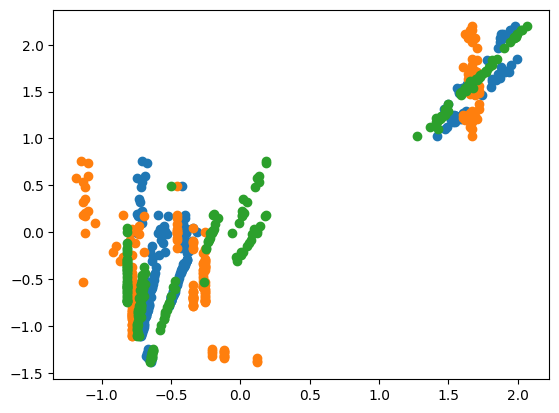

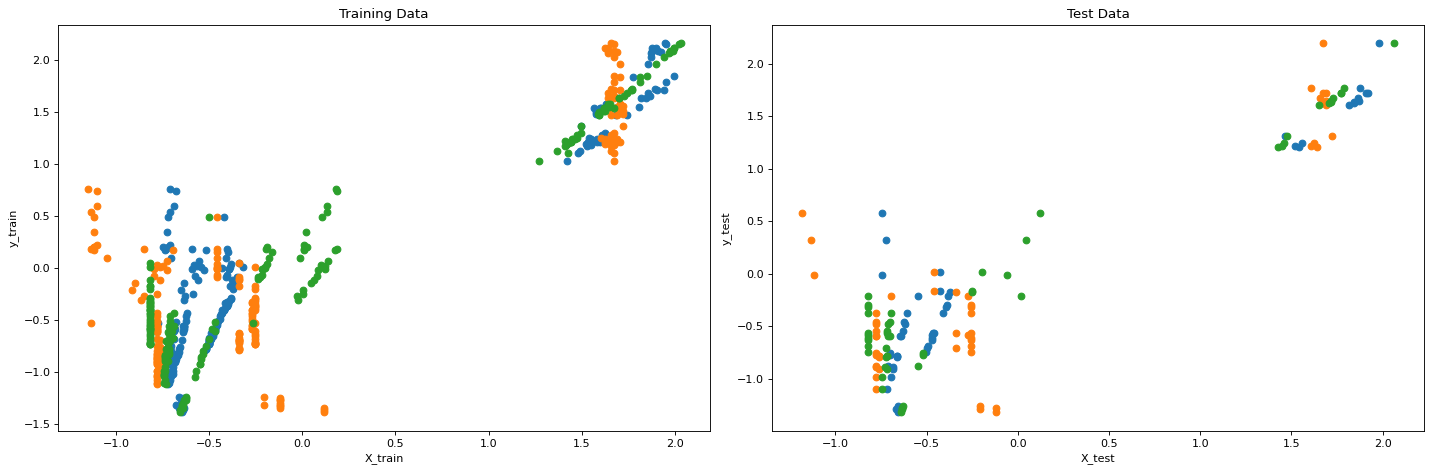

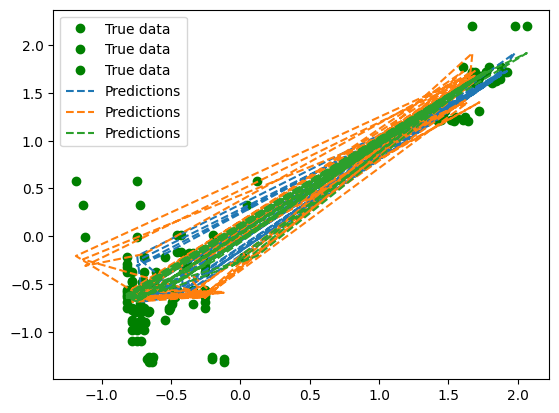

Mean Absolute Error: 0.20806820768774884
Mean Squared Error: 0.08546548609314944
Root Mean Squared Error: 0.29234480685168573


In [14]:
#Choose Input Data
X = newdf[['Delivered_Wt', 'Num_Animals', 'Price_Animal']].copy()
X = (X - np.mean(X)) / np.std(X)

#Full Dataset Visualization
plt.figure(6)#Delivered_Wt, Num_Animals, and Price_Animal
plt.scatter(X.iloc[:,0].values, y)
plt.scatter(X.iloc[:,1].values, y)
plt.scatter(X.iloc[:,2].values, y)

#Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Train Dataset and Test Dataset Visualization
figure(figsize=(18,6), dpi=80)

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_train.iloc[:,0].values, y_train)
plt.scatter(X_train.iloc[:,1].values, y_train)
plt.scatter(X_train.iloc[:,2].values, y_train)
plt.title("Training Data")
plt.xlabel('X_train')
plt.ylabel('y_train')

plt.subplot(1, 2, 2) # index 2
plt.scatter(X_test.iloc[:,0].values, y_test)
plt.scatter(X_test.iloc[:,1].values, y_test)
plt.scatter(X_test.iloc[:,2].values, y_test)
plt.title("Test Data")
plt.xlabel('X_test')
plt.ylabel('y_test')

plt.tight_layout()
plt.show()

#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor())
polyreg_fit.fit(X_train, y_train)

#Generate prediction
y_pred = polyreg_fit.predict(X_test)

#Plot the prediction
plt.clf()
plt.plot(X_test, y_test, 'go', label='True data')
plt.plot(X_test, y_pred, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

#Estimate errors
estimateError(y_test, y_pred)

# Hyperparameter Adjustment Results

**Default alpha and max_iter (alpha = 0.0001, max_itr = 1000)**

Mean Absolute Error: 0.2031208774030378

Mean Squared Error: 0.0820807630952048

Root Mean Squared Error: 0.2864974050409616

**ALPHA CHANGING, MAX_ITER CONTROLLED**

**alpha = 0.0001**

Mean Absolute Error: 0.20223290783805214

Mean Squared Error: 0.08168418227470742

Root Mean Squared Error: 0.28580444761183726

**alpha = 0.0005**

Mean Absolute Error: 0.20189787059662148

Mean Squared Error: 0.08025564507839461

Root Mean Squared Error: 0.28329427293610193

**alpha = 0.0025**

Mean Absolute Error: 0.20334755202829985

Mean Squared Error: 0.08101229727843703

Root Mean Squared Error: 0.2846265927112873

**alpha = 0.0125**

Mean Absolute Error: 0.203115153478174

Mean Squared Error: 0.08286349024999073

Root Mean Squared Error: 0.2878601921940419

**alpha = 0.0625**

Mean Absolute Error: 0.20830034338492268

Mean Squared Error: 0.08701771593734543

Root Mean Squared Error: 0.29498765387274334

**alpha = 0.3125**

Mean Absolute Error: 0.23061787000048523

Mean Squared Error: 0.10465969100312243

Root Mean Squared Error: 0.3235115005731982

**alpha = 1.0**

Mean Absolute Error: 0.27978043419018894

Mean Squared Error: 0.1363173496957191

Root Mean Squared Error: 0.3692117951741508

**ALPHA CONTROLLED, MAX_ITER CHANGING**

**max_itr = 1**

Mean Absolute Error: 0.23811089793156479

Mean Squared Error: 0.11726431200237111

Root Mean Squared Error: 0.3424387711728494

**max_itr = 10**

Mean Absolute Error: 0.21052267283060877

Mean Squared Error: 0.09009796392469073

Root Mean Squared Error: 0.30016322880174834

**SPECIAL NOTE**: The console is occasionally outputting this warning when using values up to 18: "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit. ConvergenceWarning)

**max_itr = 100**

Mean Absolute Error: 0.20266107995781088

Mean Squared Error: 0.08163554085118895

Root Mean Squared Error: 0.2857193393020307

**max_itr = 1000**

Mean Absolute Error: 0.20163035150187458

Mean Squared Error: 0.08177265293803845

Root Mean Squared Error: 0.28595918054512337

**max_itr = 10000**

Mean Absolute Error: 0.2031628861774569

Mean Squared Error: 0.08156178181493454

Root Mean Squared Error: 0.28559023410287426

# Set1 Hyperparameter Adjustments

In [15]:
def doStart():
  #Choose Input Data
  X = newdf[['Call_Wt', 'Delivered_Wt', 'Dry_Weight', 'Num_Animals', 'Price', 'Price_Animal']].copy()
  X = (X - np.mean(X)) / np.std(X)
  #Split data into Train and Test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
  return X_train, X_test, y_train, y_test

def doEnd(polyreg_fit, X_train, X_test, y_train, y_test):
  polyreg_fit.fit(X_train, y_train)
  y_pred = polyreg_fit.predict(X_test)
  estimateError(y_test, y_pred)

#Default settings
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor())
print("Default settings")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#alpha = 0.0001
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(alpha=0.0001))
print("alpha = 0.0001")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#alpha = 0.0005
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(alpha=0.0005))
print("alpha = 0.0005")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#alpha = 0.0025
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(alpha=0.0025))
print("alpha = 0.0025")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#alpha = 0.0125
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(alpha=0.0125))
print("alpha = 0.0125")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#alpha = 0.0625
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(alpha=0.0625))
print("alpha = 0.0625")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#alpha = 0.3125
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(alpha=0.3125))
print("alpha = 0.3125")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#alpha = 1.0
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(alpha=1.0))
print("alpha = 1.0")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#max_itr = 1
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=1))
print("max_itr = 1")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#max_itr = 10
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=10))
print("max_itr = 10")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#max_itr = 100
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=100))
print("max_itr = 100")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#max_itr = 1000
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=1000))
print("max_itr = 1000")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#max_itr = 10000
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=10000))
print("max_itr = 10000")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

Default settings
Mean Absolute Error: 0.2023502045798262
Mean Squared Error: 0.08166573434396983
Root Mean Squared Error: 0.28577217209513217
alpha = 0.0001
Mean Absolute Error: 0.20242313548893753
Mean Squared Error: 0.08159165228949702
Root Mean Squared Error: 0.28564252535205087
alpha = 0.0005
Mean Absolute Error: 0.20249907732580816
Mean Squared Error: 0.081648783724682
Root Mean Squared Error: 0.2857425129809738
alpha = 0.0025


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

Mean Absolute Error: 0.20437464670201205
Mean Squared Error: 0.08154508287700633
Root Mean Squared Error: 0.28556099677127883
alpha = 0.0125
Mean Absolute Error: 0.20447593761622757
Mean Squared Error: 0.08356545358456086
Root Mean Squared Error: 0.28907689908493356
alpha = 0.0625
Mean Absolute Error: 0.2078066191432093
Mean Squared Error: 0.08718247612252038
Root Mean Squared Error: 0.2952667880451853
alpha = 0.3125
Mean Absolute Error: 0.22878535592949636
Mean Squared Error: 0.10365649880973248
Root Mean Squared Error: 0.321957293456341
alpha = 1.0
Mean Absolute Error: 0.2782539999393992
Mean Squared Error: 0.1357746382677514
Root Mean Squared Error: 0.3684761027091871
max_itr = 1
Mean Absolute Error: 0.24003086588323466
Mean Squared Error: 0.11728830612275948
Root Mean Squared Error: 0.34247380355694285
max_itr = 10
Mean Absolute Error: 0.21189452365860775
Mean Squared Error: 0.08972168439035012
Root Mean Squared Error: 0.2995357814858688
max_itr = 100
Mean Absolute Error: 0.2011353

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis

In [16]:
#max_itr = 16
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=16))
print("max_itr = 16")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#max_itr = 17
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=17))
print("max_itr = 17")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

#max_itr = 18
X_train, X_test, y_train, y_test = doStart()
#Make regressor pipeline
degree = 1
polyreg_fit = make_pipeline(PolynomialFeatures(degree), SGDRegressor(max_iter=18))
print("max_itr = 18")
doEnd(polyreg_fit, X_train, X_test, y_train, y_test)

max_itr = 16


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Absolute Error: 0.20227506096931397
Mean Squared Error: 0.08197300895773137
Root Mean Squared Error: 0.28630928898261643
max_itr = 17
Mean Absolute Error: 0.20451731963511374
Mean Squared Error: 0.08062909825734682
Root Mean Squared Error: 0.28395263382709945
max_itr = 18
Mean Absolute Error: 0.204655120176316
Mean Squared Error: 0.082980693157162
Root Mean Squared Error: 0.2880636963540564


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
